In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")
df['date'] = pd.to_datetime(df['date'])

In [3]:
dados_vacina = df.query("state == 'TOTAL'")[['date', 'vaccinated_second', 'vaccinated_single']]
dados_vacina = dados_vacina.fillna(0)
dados_vacina['fully_vaccinated'] = dados_vacina['vaccinated_second'] + dados_vacina['vaccinated_single']

dados_vacina

,date,vaccinated_second,vaccinated_single,fully_vaccinated
1,2020-02-25,0.0,0.0,0.0
3,2020-02-26,0.0,0.0,0.0
5,2020-02-27,0.0,0.0,0.0
7,2020-02-28,0.0,0.0,0.0
9,2020-02-29,0.0,0.0,0.0
...,...,...,...,...
13817,2021-07-18,30228936.0,3662308.0,33891244.0
13845,2021-07-19,30647036.0,3736681.0,34383717.0
13873,2021-07-20,31214052.0,3839714.0,35053766.0
13901,2021-07-21,31894782.0,3913298.0,35808080.0


In [4]:
dados_vacina = dados_vacina.drop(columns=['vaccinated_second', 'vaccinated_single'])
dados_vacina = dados_vacina[dados_vacina != 0].dropna()
dados_vacina = dados_vacina.reset_index(drop=True)

dados_vacina

,date,fully_vaccinated
0,2021-02-05,1962.0
1,2021-02-06,19677.0
2,2021-02-07,25688.0
3,2021-02-08,33616.0
4,2021-02-09,50655.0
...,...,...
163,2021-07-18,33891244.0
164,2021-07-19,34383717.0
165,2021-07-20,35053766.0
166,2021-07-21,35808080.0


In [5]:
Y = dados_vacina['fully_vaccinated'].to_numpy()
X = np.array(dados_vacina.index.tolist())

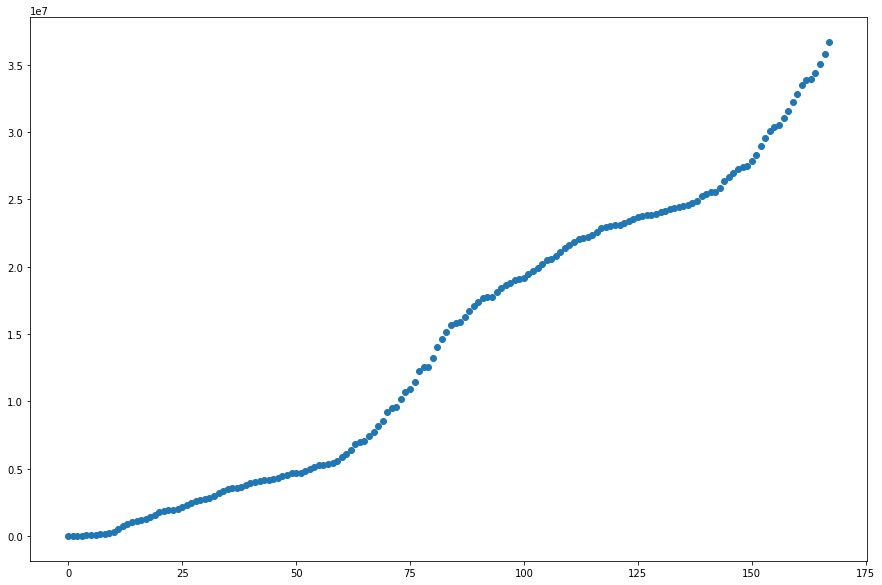

In [6]:
plt.rcParams["figure.figsize"] = (15,10)
plt.scatter(X,Y)

In [7]:
def regressao_linear(x, y):
    '''Retorna o coeficiente angular e linear da reta de regressão'''
    media_x = np.mean(x)
    media_y = np.mean(y)

    soma_x = np.sum(x)
    soma_y = np.sum(y)
    soma_xy = np.sum(x * y)
    soma_x_quadrado = np.sum(x * x)

    n = len(x)

    coef_angular = (n * soma_xy - soma_x * soma_y) / (n * soma_x_quadrado - soma_x * soma_x)
    coef_linear = media_y - coef_angular * media_x

    return {'coef_angular': coef_angular, 'coef_linear': coef_linear}

In [8]:
regressao_linear(X, Y)

{'coef_angular': 218081.45061019127, 'coef_linear': -3777711.0902366843}

(0.0, 37676823.0)

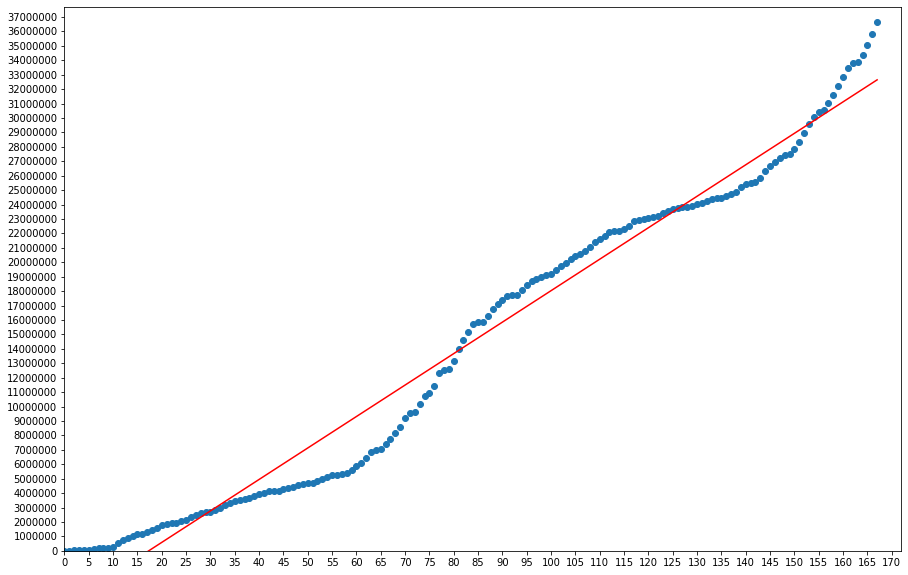

In [9]:
plt.scatter(X, Y)
plt.plot(X, regressao_linear(X, Y)['coef_angular'] * X + regressao_linear(X, Y)['coef_linear'], color='red')
plt.ticklabel_format(style='plain')
plt.xticks(np.arange(0, max(X)+5, 5.0))
plt.yticks(np.arange(0, max(Y)+1000000, 1000000.0))
plt.xlim([0, max(X) + 5])
plt.ylim([0, max(Y) + 1000000])

In [10]:
previsao_fim_vacinacao = round((211000000 - regressao_linear(X, Y)['coef_linear']) / regressao_linear(X, Y)['coef_angular'])

previsao_fim_vacinacao

985

In [11]:
X2 = np.arange(0, previsao_fim_vacinacao + 50)
Y2 = X2 * regressao_linear(X, Y)['coef_angular'] + regressao_linear(X, Y)['coef_linear']

In [12]:
X2

array([   0,    1,    2, ..., 1032, 1033, 1034])

In [13]:
Y2

array([-3.77771109e+06, -3.55962964e+06, -3.34154819e+06, ...,
        2.21282346e+08,  2.21500427e+08,  2.21718509e+08])

(0.0, 231718508.84070107)

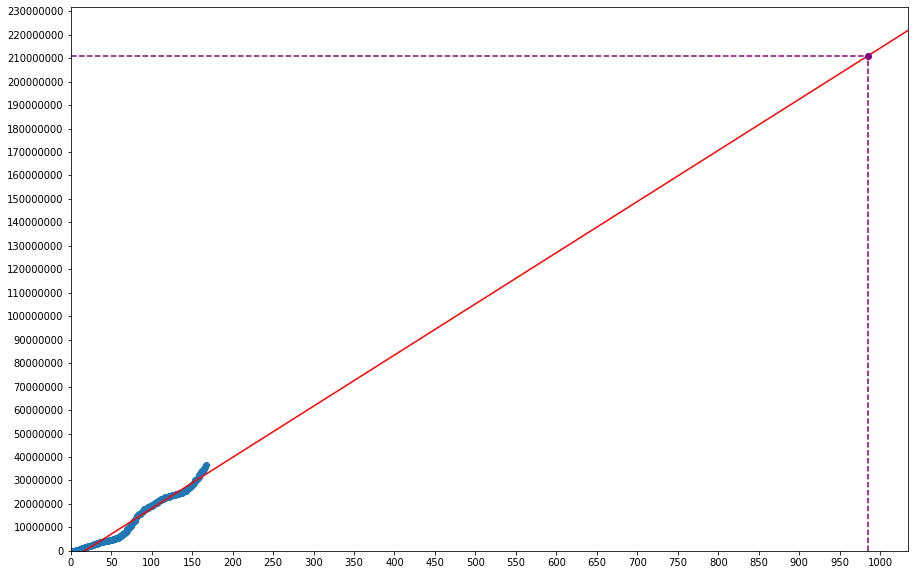

In [14]:
#Dados da vacinação

plt.scatter(X, Y)

#Reta de regressão
plt.plot(X2, Y2, color='red')

#Ponto da vacinação completa
plt.plot(X2[previsao_fim_vacinacao], Y2[previsao_fim_vacinacao], color='purple', marker='o')
plt.vlines(X2[previsao_fim_vacinacao],0,Y2[previsao_fim_vacinacao], linestyles='dashed', color='purple')
plt.hlines(Y2[previsao_fim_vacinacao],0,X2[previsao_fim_vacinacao], linestyles='dashed', color='purple')

#Formatação dos eixos
plt.ticklabel_format(style='plain')
plt.xticks(np.arange(0, max(X2)+50, 50.0))
plt.yticks(np.arange(0, max(Y2)+10000000, 10000000.0))
plt.xlim([0, max(X2)])
plt.ylim([0, max(Y2) + 10000000])

In [15]:
dados_vacina.loc[147]

date                2021-07-02 00:00:00
fully_vaccinated            2.72595e+07
Name: 147, dtype: object

In [16]:
regressao_linear(X, Y)['coef_angular'] * 147 + regressao_linear(X, Y)['coef_linear']

28280262.149461433

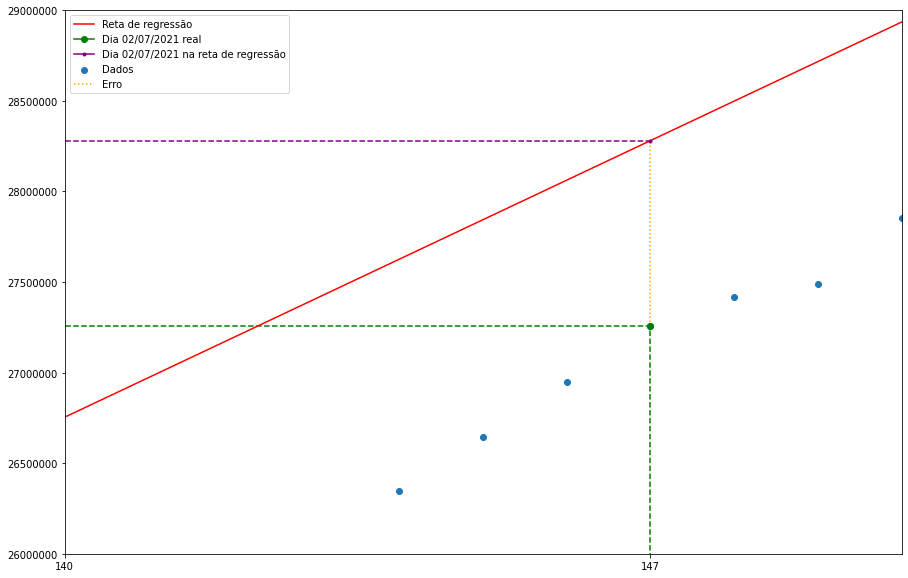

In [17]:
plt.scatter(X, Y, label='Dados')

plt.plot(X, regressao_linear(X, Y)['coef_angular'] * X + regressao_linear(X, Y)['coef_linear'], color='red', label='Reta de regressão')

plt.plot(X[147], dados_vacina.loc[147]['fully_vaccinated'], color='green', marker='o', label='Dia 02/07/2021 real')
plt.vlines(X[147],0,dados_vacina.loc[147]['fully_vaccinated'], linestyles='dashed', color='green')
plt.hlines(dados_vacina.loc[147]['fully_vaccinated'],0,X[147], linestyles='dashed', color='green')

plt.plot(X[147], regressao_linear(X, Y)['coef_angular'] * 147 + regressao_linear(X, Y)['coef_linear'], color='purple', marker='.', label='Dia 02/07/2021 na reta de regressão')
plt.vlines(X[147],dados_vacina.loc[147]['fully_vaccinated'],regressao_linear(X, Y)['coef_angular'] * 147 + regressao_linear(X, Y)['coef_linear'], linestyles='dotted', color='orange', label='Erro')
plt.hlines(regressao_linear(X, Y)['coef_angular'] * 147 + regressao_linear(X, Y)['coef_linear'],0,X[147], linestyles='dashed', color='purple')

plt.ticklabel_format(style='plain')
plt.xticks(np.arange(0, max(X2)+50, 7.0))
plt.yticks(np.arange(0, max(Y2)+500000, 500000.0))
plt.xlim([140, 150])
plt.ylim([26000000, 29000000])
plt.legend()

In [18]:
erro = (regressao_linear(X, Y)['coef_angular'] * 147 + regressao_linear(X, Y)['coef_linear']) / dados_vacina.loc[147]['fully_vaccinated']

print('{:.2f}%'.format(erro * 100))

103.74%


In [19]:
round(previsao_fim_vacinacao * erro)

1022

In [20]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
regressao = sm.OLS(Y, X_sm).fit()
regressao.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     5945.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):          6.60e-132
Time:                        16:17:03   Log-Likelihood:                -2655.1
No. Observations:                 168   AIC:                             5314.
Df Residuals:                     166   BIC:                             5320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.778e+06   2.73e+05    -13.832      0.000   -4.32e+06   -3.24e+06
x1          2.181e+05   2828.439     77.103      0.000    2.12e+05    2.24e+05
==============================================================================
Omnibus:                        7.669   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                4.312
Skew:                          -0.190   Prob(JB):                        0.116
Kurtosis:                       2.313   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""